In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

import tensorflow as tf

In [4]:
# access Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/MyDrive/'Colab Notebooks'/

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


In [5]:
# load dataset from Google Drive
dm_data = pd.read_csv(r'diamonds.csv')

# drop unnamed columns
dm_data = dm_data.drop('Unnamed: 0', axis=1)
print(dm_data.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [6]:
# extract features and labels
features = dm_data.drop('price', axis=1)
labels = dm_data.price

print(features.head())
print(labels.head())

   carat      cut color clarity  depth  table     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75
0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64


In [8]:
# Ordinal encode categorical features
cut_categories = ['Fair','Good','Very Good','Premium','Ideal']
color_categories = ['J','I','H','G','F','E','D']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
ordinal_encoder = OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])
features[['cut','color','clarity']] = ordinal_encoder.fit_transform(features[['cut','color','clarity']])

print("Transformed Features:")
print(features.head())

Transformed Features:
   carat  cut  color  clarity  depth  table     x     y     z
0   0.23  4.0    5.0      1.0   61.5   55.0  3.95  3.98  2.43
1   0.21  3.0    5.0      2.0   59.8   61.0  3.89  3.84  2.31
2   0.23  1.0    5.0      4.0   56.9   65.0  4.05  4.07  2.31
3   0.29  3.0    1.0      3.0   62.4   58.0  4.20  4.23  2.63
4   0.31  1.0    0.0      1.0   63.3   58.0  4.34  4.35  2.75


In [9]:
# Split the data into train-validation-test sets, with a ratio of 60:20:20

SEED = 12345
x_train,x_iter,y_train,y_iter = train_test_split(features, labels, test_size=0.4, random_state=SEED)
x_val,x_test,y_val,y_test = train_test_split(x_iter, y_iter, test_size=0.5, random_state=SEED)

In [10]:
# Perform feature scaling, using training data for fitting
standard_scaler = StandardScaler()
standard_scaler.fit(x_train)
x_train = standard_scaler.transform(x_train)
x_val = standard_scaler.transform(x_val)
x_test = standard_scaler.transform(x_test)

#Data preparation completed

In [11]:
# Create a feedforward neural network using TensorFlow Keras
number_input = x_train.shape[-1]
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=number_input))
model.add(tf.keras.layers.Dense(128,activation='elu'))
model.add(tf.keras.layers.Dense(64,activation='elu'))
model.add(tf.keras.layers.Dense(32,activation='elu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae','mse'])

In [12]:
# Train and evaluate the model with validation data
# Define callback functions: EarlyStopping and Tensorboard

import datetime
import os

base_log_path = r"Tensorboard\log_diamonds"
log_path = os.path.join(base_log_path, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_path)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,verbose=2)
EPOCHS = 100
BATCH_SIZE=64
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=[tb_callback,es_callback])

Epoch 1/100
506/506 [==============================] - 3s 4ms/step - loss: 14151212.0000 - mae: 2422.1072 - mse: 14151212.0000 - val_loss: 2329516.7500 - val_mae: 1092.0780 - val_mse: 2329516.7500
Epoch 2/100
506/506 [==============================] - 2s 3ms/step - loss: 2908448.0000 - mae: 1166.2336 - mse: 2908448.0000 - val_loss: 1628396.8750 - val_mae: 778.0931 - val_mse: 1628396.8750
Epoch 3/100
506/506 [==============================] - 1s 3ms/step - loss: 2643002.0000 - mae: 1045.0315 - mse: 2643002.0000 - val_loss: 1532252.8750 - val_mae: 711.3580 - val_mse: 1532252.8750
Epoch 4/100
506/506 [==============================] - 2s 3ms/step - loss: 2506765.5000 - mae: 987.8422 - mse: 2506765.5000 - val_loss: 1474773.3750 - val_mae: 665.7302 - val_mse: 1474773.3750
Epoch 5/100
506/506 [==============================] - 2s 3ms/step - loss: 2405234.7500 - mae: 948.8184 - mse: 2405234.7500 - val_loss: 1332533.0000 - val_mae: 617.8030 - val_mse: 1332533.0000
Epoch 6/100
506/506 [========

In [13]:
# Evaluate with test data for wild testing
test_result = model.evaluate(x_test,y_test,batch_size=BATCH_SIZE)
print(f"Test loss = {test_result[0]}")
print(f"Test MAE = {test_result[1]}")
print(f"Test MSE = {test_result[2]}")

169/169 [==============================] - 0s 1ms/step - loss: 603971.5625 - mae: 362.7646 - mse: 603971.5625
Test loss = 603971.5625
Test MAE = 362.7646179199219
Test MSE = 603971.5625


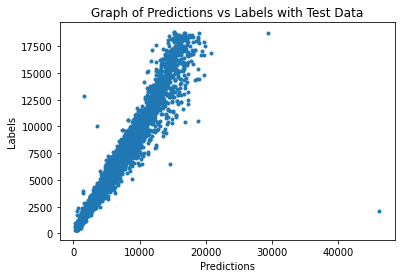

In [19]:
# Plot a graph of prediction vs label on test data

predictions = np.squeeze(model.predict(x_test))
labels = np.squeeze(y_test)
plt.plot(predictions,labels,".")
plt.xlabel("Predictions")
plt.ylabel("Labels")
plt.title("Graph of Predictions vs Labels with Test Data")
plt.savefig('result.png', bbox_inches='tight')
plt.show()